           X          Y
0  13.117928  17.219461
1  26.994258  19.912078
2  12.552476  23.800750
3  27.761221  23.878208
4  27.718304  18.495450

Columns in the dataset:
Index(['X', 'Y'], dtype='object')


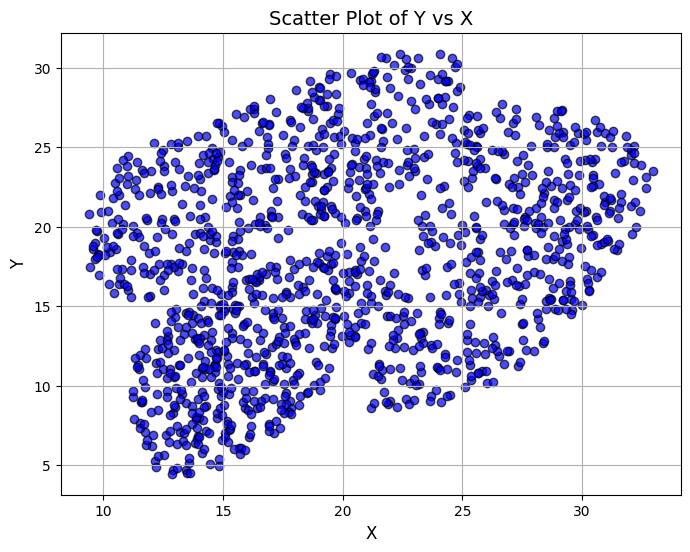

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
# Load the CSV file
file_path = "/content/data.csv"
data = pd.read_csv(file_path)

# Print the first 5 rows to understand the data structure
print(data.head())

# column names
print("\nColumns in the dataset:")
print(data.columns)

x_col = 'X'
y_col = 'Y'
X = data[[x_col, y_col]].values
plt.figure(figsize=(8, 6))
plt.scatter(data[x_col], data[y_col], color='blue', edgecolor='k', alpha=0.7)
plt.title(f'Scatter Plot of {y_col} vs {x_col}', fontsize=14)
plt.xlabel(x_col, fontsize=12)
plt.ylabel(y_col, fontsize=12)
plt.grid(True)
plt.show()

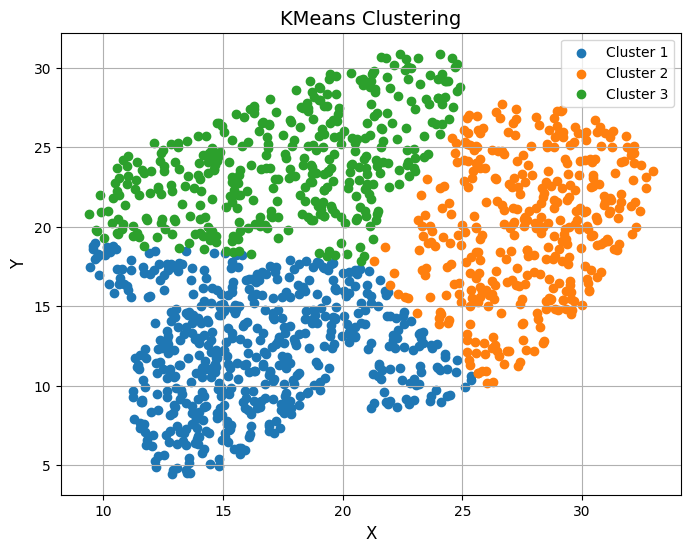

KMeans Clustering Evaluation:
Silhouette Score: 0.4207
Davies-Bouldin Index: 0.8308


In [2]:



X = data[['X', 'Y']].values

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster_KMeans'] = kmeans.fit_predict(X) + 1  # Shift labels to start from 1

# Calculate Silhouette Score and Davies-Bouldin Score for KMeans
kmeans_silhouette = silhouette_score(X, data['Cluster_KMeans'])
kmeans_db_index = davies_bouldin_score(X, data['Cluster_KMeans'])

# Plot KMeans clustering result
plt.figure(figsize=(8, 6))
for cluster in range(1, 4):
    cluster_data = data[data['Cluster_KMeans'] == cluster]
    plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {cluster}')
plt.title('KMeans Clustering', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Print KMeans Evaluation
print("KMeans Clustering Evaluation:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Davies-Bouldin Index: {kmeans_db_index:.4f}")


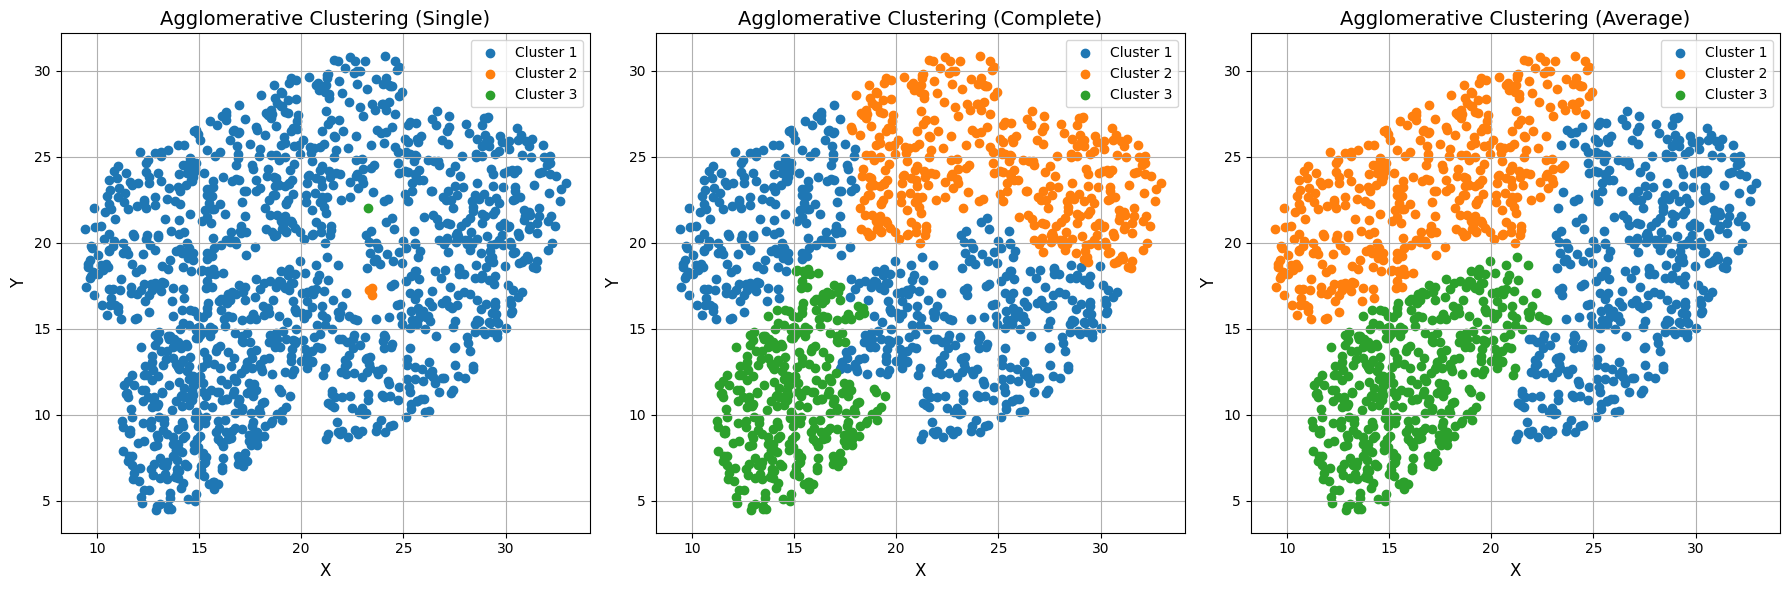


Agglomerative Clustering (Single) Evaluation:
Silhouette Score: -0.3216
Davies-Bouldin Index: 2.0808

Agglomerative Clustering (Complete) Evaluation:
Silhouette Score: 0.2606
Davies-Bouldin Index: 1.3489

Agglomerative Clustering (Average) Evaluation:
Silhouette Score: 0.3875
Davies-Bouldin Index: 0.8940


In [3]:



X = data[['X', 'Y']].values

# Define linkage types to compare
linkage_methods = ['single', 'complete', 'average']

# Create subplots for visualizing results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Store evaluation results
evaluation_results = []

for i, linkage in enumerate(linkage_methods):
    clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    labels = clustering.fit_predict(X)

    # Shift labels to start from 1
    labels = labels + 1

    # Calculate Silhouette Score and Davies-Bouldin Score for Agglomerative Clustering
    silhouette = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)

    evaluation_results.append({
        'Clustering Method': f'Agglomerative Clustering ({linkage.capitalize()})',
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_index
    })

    # Plot Agglomerative clustering result
    for cluster in range(1, 4):
        cluster_data = X[labels == cluster]
        axes[i].scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

    axes[i].set_title(f'Agglomerative Clustering ({linkage.capitalize()})', fontsize=14)
    axes[i].set_xlabel('X', fontsize=12)
    axes[i].set_ylabel('Y', fontsize=12)
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Print Agglomerative Clustering Evaluation
for result in evaluation_results:
    print(f"\n{result['Clustering Method']} Evaluation:")
    print(f"Silhouette Score: {result['Silhouette Score']:.4f}")
    print(f"Davies-Bouldin Index: {result['Davies-Bouldin Index']:.4f}")


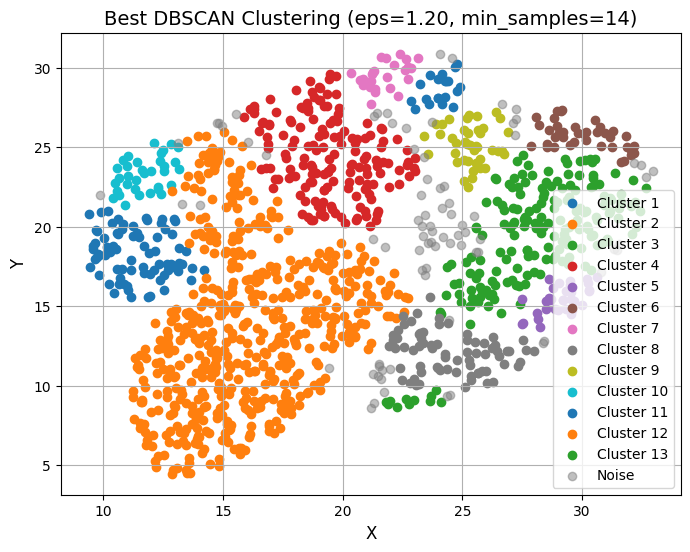


DBSCAN Clustering Evaluation (eps=1.20, min_samples=14):
Silhouette Score: 0.1311
Davies-Bouldin Index: 1.0936


In [4]:


X = data[['X', 'Y']].values

# Define parameter grid for DBSCAN
eps_values = np.linspace(0.1, 2.0, 20)  # Range of eps values
min_samples_values = range(3, 15)  # Range of min_samples values

best_score = -1  # To store the best combined score (Silhouette + DB Index)
best_eps = 0
best_min_samples = 0
best_dbscan = None

# Perform grid search for best DBSCAN parameters
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)

        # Ignore the case where all points are classified as noise
        if len(set(clusters)) > 1:  # At least one cluster
            try:
                # Calculate Silhouette score
                silhouette = silhouette_score(X, clusters)
                # Calculate Davies-Bouldin Index
                dbi = davies_bouldin_score(X, clusters)

                # Combine scores: Maximize silhouette, minimize DBI
                combined_score = silhouette - dbi

                # If this combination gives a better score, update the best result
                if combined_score > best_score:
                    best_score = combined_score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_dbscan = dbscan
            except ValueError:
                continue

# Apply the best DBSCAN model
best_clusters = best_dbscan.fit_predict(X)

# Shift cluster labels to start from 1, keeping noise as -1
best_clusters_shifted = np.where(best_clusters == -1, -1, best_clusters + 1)
data['Cluster_DBSCAN'] = best_clusters_shifted

# Calculate Silhouette Score and Davies-Bouldin Score for DBSCAN
dbscan_silhouette = silhouette_score(X, best_clusters_shifted)
dbscan_db_index = davies_bouldin_score(X, best_clusters_shifted)

# Plot DBSCAN clustering result
plt.figure(figsize=(8, 6))
unique_labels = set(best_clusters_shifted)
for label in unique_labels:
    cluster_data = data[data['Cluster_DBSCAN'] == label]
    # Plot noise points (-1) in a different color
    if label == -1:
        plt.scatter(cluster_data['X'], cluster_data['Y'], label='Noise', color='gray', alpha=0.5)
    else:
        plt.scatter(cluster_data['X'], cluster_data['Y'], label=f'Cluster {label}')
plt.title(f'Best DBSCAN Clustering (eps={best_eps:.2f}, min_samples={best_min_samples})', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Print DBSCAN Evaluation
print(f"\nDBSCAN Clustering Evaluation (eps={best_eps:.2f}, min_samples={best_min_samples}):")
print(f"Silhouette Score: {dbscan_silhouette:.4f}")
print(f"Davies-Bouldin Index: {dbscan_db_index:.4f}")


In [5]:
# Prepare a DataFrame to store evaluation results for all methods
evaluation_results_all = []

# KMeans Evaluation
evaluation_results_all.append({
    'Clustering Method': 'KMeans',
    'Silhouette Score': kmeans_silhouette,
    'Davies-Bouldin Index': kmeans_db_index
})

# Agglomerative Clustering Evaluation
for result in evaluation_results:
    evaluation_results_all.append(result)

# DBSCAN Evaluation
evaluation_results_all.append({
    'Clustering Method': f'DBSCAN (eps={best_eps:.2f}, min_samples={best_min_samples})',
    'Silhouette Score': dbscan_silhouette,
    'Davies-Bouldin Index': dbscan_db_index
})

# Create DataFrame from the evaluation results
evaluation_df = pd.DataFrame(evaluation_results_all)

# Display the evaluation DataFrame
print("\nClustering Evaluation Summary:")
print(evaluation_df)



Clustering Evaluation Summary:
                     Clustering Method  Silhouette Score  Davies-Bouldin Index
0                               KMeans          0.420725              0.830806
1    Agglomerative Clustering (Single)         -0.321561              2.080826
2  Agglomerative Clustering (Complete)          0.260627              1.348877
3   Agglomerative Clustering (Average)          0.387497              0.894025
4    DBSCAN (eps=1.20, min_samples=14)          0.131108              1.093644


Now, I am doing 3 types of feature scaling and then apply Agglomerative and K-means Clustering.

Below is for K-means Clustering

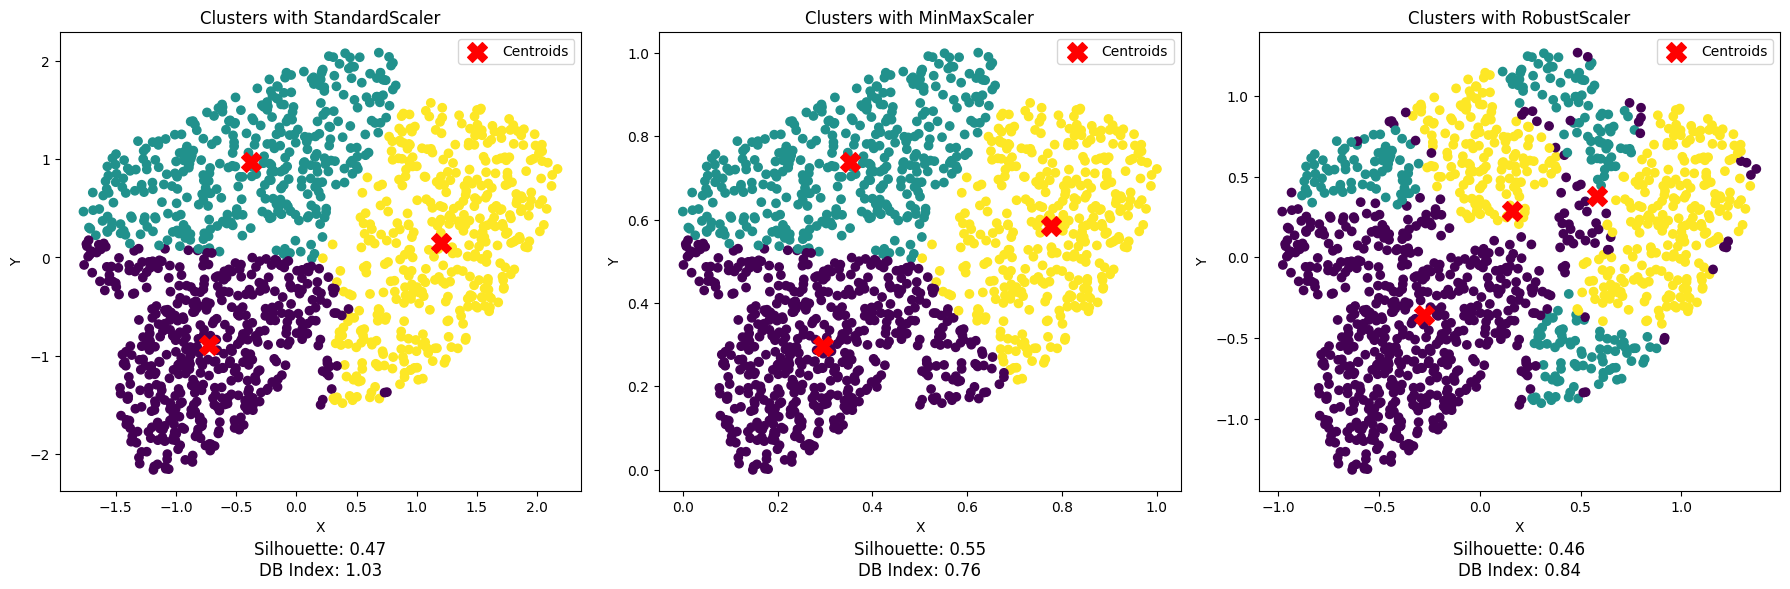

In [6]:


scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Set up the subplots (3 plots in 1 row)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 2. Apply KMeans Clustering and Evaluate
for idx, (scaler_name, scaler) in enumerate(scalers.items()):
    scaled_data = scaler.fit_transform(data)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(scaled_data)

    # Get the labels and the cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Evaluate using silhouette score and DB index
    silhouette = silhouette_score(scaled_data, labels)
    db_index = davies_bouldin_score(scaled_data, labels)

    # Plotting the clusters
    ax = axes[idx]
    ax.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis')
    ax.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
    ax.set_title(f'Clusters with {scaler_name}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

    # Add Silhouette Score and DB Index below the plot
    ax.text(0.5, -0.15, f'Silhouette: {silhouette:.2f}\nDB Index: {db_index:.2f}',
            ha='center', va='center', transform=ax.transAxes, fontsize=12)

# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()

The Below cell is for the three types of Agglomerative Clustering

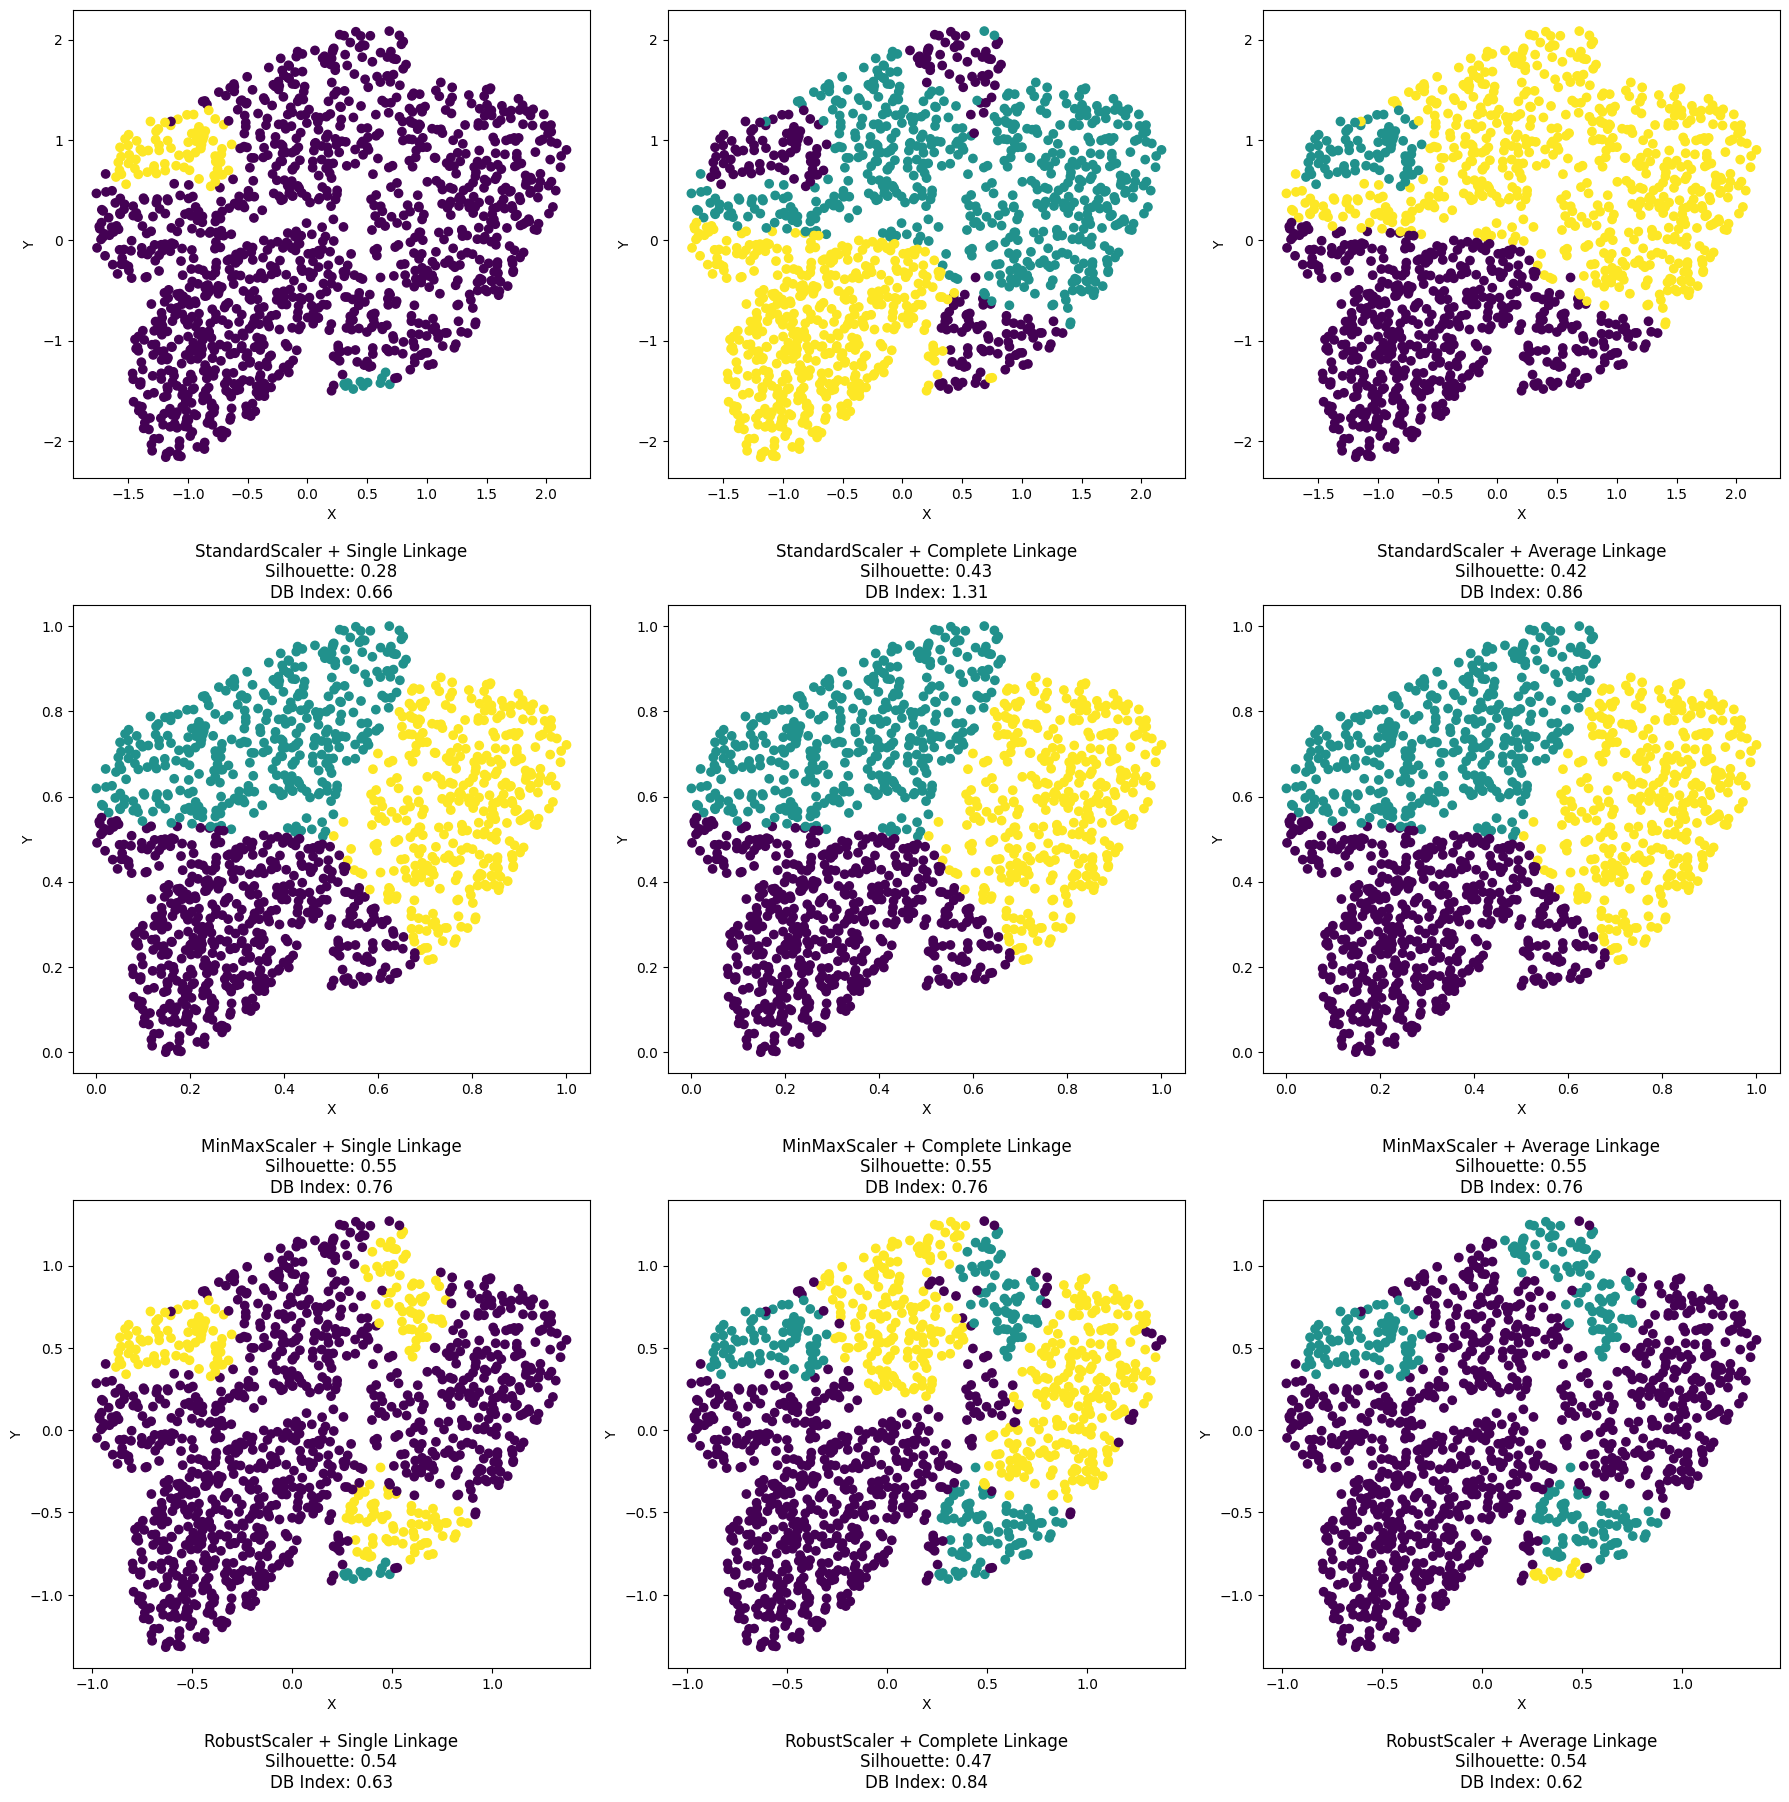

In [7]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Linkage Methods for Agglomerative Clustering
linkage_methods = ['single', 'complete', 'average']

# Set up the subplots (3 rows and 3 columns for each combination of scaler and linkage method)
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# 2. Apply Agglomerative Clustering and Evaluate
for i, (scaler_name, scaler) in enumerate(scalers.items()):
    scaled_data = scaler.fit_transform(data)

    for j, linkage in enumerate(linkage_methods):
        # Apply Agglomerative Clustering
        agglomerative = AgglomerativeClustering(n_clusters=3, linkage=linkage)
        labels = agglomerative.fit_predict(scaled_data)

        # Evaluate using silhouette score and DB index
        silhouette = silhouette_score(scaled_data, labels)
        db_index = davies_bouldin_score(scaled_data, labels)

        # Plotting the clusters
        ax = axes[i, j]
        scatter = ax.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

        # Add Plot Name, Silhouette Score, and DB Index below the plot
        plot_name = f"{scaler_name} + {linkage.capitalize()} Linkage"
        ax.text(0.5, -0.2, f'{plot_name}\nSilhouette: {silhouette:.2f}\nDB Index: {db_index:.2f}',
                ha='center', va='center', transform=ax.transAxes, fontsize=12)

# Adjust layout to ensure no overlapping
plt.tight_layout()
plt.show()


As we can see in k-means done after min-max scaling, the Silhouette Score is highest(0.55) and db index 0.76(lowest).These index indicates better clustering especially in the case when we do not have a ground truth. Same value is also there for min-max agglomerative clustering. These as the best results obtained from all the plots and evaluation I have done. Below is the final clustering I have applied and  text file generated for k-means clustering after min_max scaling.

In [8]:


scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Get the labels and the cluster centers
labels = kmeans.labels_

# Evaluate clustering using silhouette score and Davies-Bouldin index(DB Index)
silhouette = silhouette_score(scaled_data, labels)
db_index = davies_bouldin_score(scaled_data, labels)

# Save the labels to a text file
with open('minmax_k-means_cluster_labels.txt', 'w') as file:
    for label in labels:
        file.write(f'{label}\n')

# Print evaluation metrics
print(f'Silhouette Score: {silhouette:.2f}')
print(f'Davies-Bouldin Index: {db_index:.2f}')


Silhouette Score: 0.55
Davies-Bouldin Index: 0.76
